In [4]:
pip install pandas geopandas matplotlib

  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached pillow-11.2.1-cp310-cp310-manylinux_2_28_x86_64.whl (4.6 MB)
  Using cached fonttools-4.57.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
il = gpd.read_file('/home/emine2/ATMS-402/IL_BNDY_County/IL_BNDY_County_Py.shp')
il


In [10]:
county = (
    gpd.read_file('/home/emine2/ATMS-402/IL_BNDY_County/IL_BNDY_County_Py.shp')
    .dropna(subset=['CO_FIPS'])
    .rename(columns={'CO_FIPS':'county_fips'})
    .astype({'county_fips': int})
    .to_crs(epsg=4326)
)

In [ ]:
#county = county[county['county_fips'].astype(str).str.startswith('17')]

In [11]:
insurance = pd.read_csv('/home/emine2/rotation_02/codes2/insurance_extremes_cropFiltered.csv')

In [12]:
insurance.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
#insurance.drop('Unnamed: 0', axis=1, inplace=True)
insurance.head()

,state_code,state_abbreviation,county_code,county_name,commodity_code,commodity_name,cause_of_loss_code,month_of_loss,month_of_loss_name,year_of_loss,...,total_premium,producer_paid_premium,subsidy,efa_premium_discount,net_determined_quantity,indemnity_amount,loss_ratio,county_fips,year,cause_lower
0,1,AL,1,Autauga,11,wheat,11,5.0,MAY,2016.0,...,384.45,38.28,346.17,0.0,22.011,2979.24,7.75,1001,2016,drought
1,1,AL,1,Autauga,11,wheat,31,2.0,FEB,2016.0,...,771.46,77.18,694.28,0.0,44.166,4735.52,6.14,1001,2016,excess moisture/precipitation/rain
2,1,AL,1,Autauga,11,wheat,31,3.0,MAR,2016.0,...,737.73,73.80,663.93,0.0,42.235,4547.24,6.16,1001,2016,excess moisture/precipitation/rain
3,1,AL,1,Autauga,21,cotton,11,8.0,AUG,2016.0,...,4067.00,1668.00,2399.00,0.0,103.000,1303.00,0.32,1001,2016,drought
4,1,AL,1,Autauga,41,corn,11,6.0,JUN,2016.0,...,8719.00,1744.00,6975.00,0.0,218.400,7656.00,0.88,1001,2016,drought


In [14]:
insurance = insurance[insurance['state_abbreviation']=='IL'] # corn code =41
insurance

,state_code,state_abbreviation,county_code,county_name,commodity_code,commodity_name,cause_of_loss_code,month_of_loss,month_of_loss_name,year_of_loss,...,total_premium,producer_paid_premium,subsidy,efa_premium_discount,net_determined_quantity,indemnity_amount,loss_ratio,county_fips,year,cause_lower
5105,17,IL,1,Adams,11,wheat,11,7.0,JUL,2016.0,...,236.00,106.00,130.00,0.0,7.9000,623.0,2.64,17001,2016,drought
5106,17,IL,1,Adams,11,wheat,31,8.0,AUG,2016.0,...,230.00,120.00,110.00,0.0,5.3000,418.0,1.82,17001,2016,excess moisture/precipitation/rain
5107,17,IL,1,Adams,11,wheat,31,4.0,APR,2016.0,...,1300.00,600.00,700.00,0.0,40.6000,2333.0,1.79,17001,2016,excess moisture/precipitation/rain
5108,17,IL,1,Adams,11,wheat,31,7.0,JUL,2016.0,...,2413.00,855.00,1558.00,0.0,72.9000,7969.0,3.30,17001,2016,excess moisture/precipitation/rain
5109,17,IL,1,Adams,11,wheat,31,6.0,JUN,2016.0,...,311.00,140.00,171.00,0.0,11.2000,343.0,1.10,17001,2016,excess moisture/precipitation/rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941847,17,IL,203,Woodford,81,soybeans,21,5.0,MAY,2023.0,...,9424.92,4206.25,5218.67,0.0,309.6587,12782.8,1.36,17203,2023,hail
941848,17,IL,203,Woodford,81,soybeans,31,5.0,MAY,2023.0,...,21393.50,9110.00,11616.50,0.0,730.9025,34671.5,1.62,17203,2023,excess moisture/precipitation/rain
941849,17,IL,203,Woodford,81,soybeans,31,6.0,JUN,2023.0,...,848.00,525.00,323.00,0.0,77.0300,4672.0,5.51,17203,2023,excess moisture/precipitation/rain
941850,17,IL,203,Woodford,81,soybeans,31,4.0,APR,2023.0,...,3664.00,1395.00,2269.00,0.0,119.9550,4952.0,1.35,17203,2023,excess moisture/precipitation/rain


In [31]:
insurance['county_fips'].describe

<bound method NDFrame.describe of 5105      17001
5106      17001
5107      17001
5108      17001
5109      17001
          ...  
941847    17203
941848    17203
941849    17203
941850    17203
941851    17203
Name: county_fips, Length: 71900, dtype: int64>

In [17]:
causes = insurance['cause_lower'].unique().tolist()
print(causes)

['drought', 'excess moisture/precipitation/rain', 'flood', 'heat', 'hail']


In [12]:
#ins_corn.to_csv('/home/emine2/ATMS-402/data_for_atms_1989-2025_corn_IL.csv')

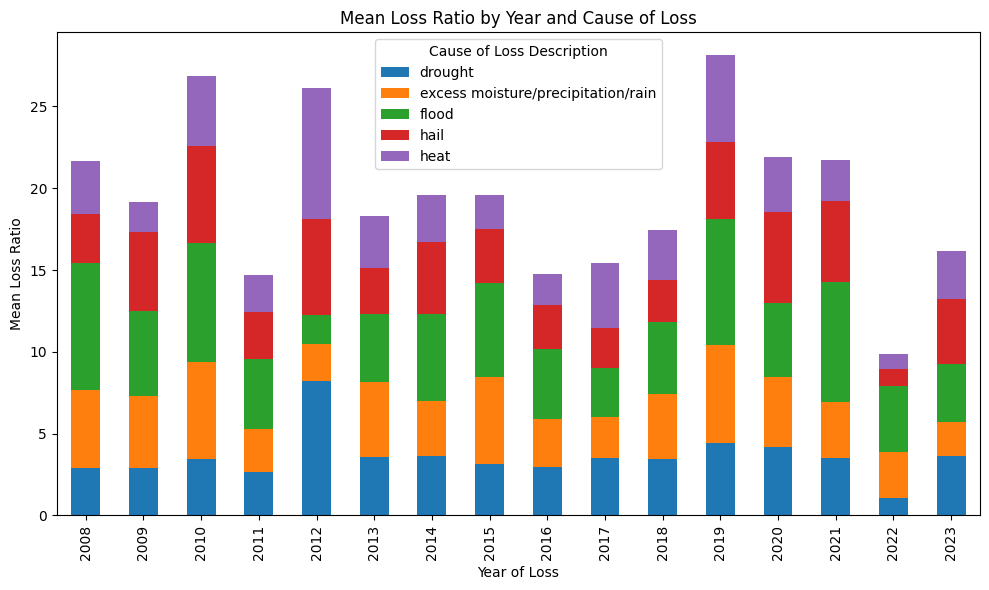

In [20]:
# Group by year and cause, then compute the mean loss_ratio for each group
pivot_loss_ratio = insurance.groupby(['year', 'cause_lower'])['loss_ratio'].mean().unstack().fillna(0)

ax = pivot_loss_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mean Loss Ratio by Year and Cause of Loss')
plt.xlabel('Year of Loss')
plt.ylabel('Mean Loss Ratio')
plt.legend(title='Cause of Loss Description')
plt.tight_layout()
plt.show()

In [21]:
era5 = pd.read_csv('/home/emine2/ATMS-402/ERA5_noshape_t2m_1991_2024_yearly_04222025.csv')
era5.drop(columns=['Unnamed: 0'], inplace=True)
era5['state'] = 17
era5['state'] = era5['state'].astype(int)

In [22]:
era5.head()

,COUNTY_NAM,CO_FIPS,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,state
0,MCHENRY,111,283.108126,281.979699,281.854914,282.305666,282.200697,281.054110,281.647160,284.144753,...,283.782038,283.478720,282.513708,282.277070,283.494687,284.063322,282.799744,284.136898,284.466730,17
1,BOONE,7,283.042303,281.987580,281.788267,282.214520,282.171985,281.016170,281.620088,284.074145,...,283.818526,283.515786,282.504624,282.281854,283.473384,284.146290,282.788585,284.197761,284.466305,17
2,OGLE,141,283.292098,282.288756,281.985580,282.395781,282.523819,281.323026,281.899859,284.334644,...,284.217381,283.903354,282.813598,282.522212,283.797708,284.351283,283.046285,284.469579,284.762684,17
3,WILL,197,284.357985,283.089739,282.896492,283.438828,283.694083,282.390235,282.862058,285.213323,...,284.989135,284.776946,283.788226,283.520472,284.614100,284.922132,284.030467,285.289765,285.535371,17
4,LASALLE,99,284.299994,283.174992,282.829609,283.412675,283.615303,282.350196,282.858204,285.150457,...,285.170125,284.871532,283.729267,283.483121,284.660521,284.911118,284.008297,285.368811,285.655344,17


In [23]:
era5['CO_FIPS'] = era5['CO_FIPS'].astype(str).str.strip()  # Remove leading/trailing spaces
era5['CO_FIPS'] = era5['CO_FIPS'].str.split('.').str[0]  # Remove decimal points (e.g., '40.0' -> '40')
era5['CO_FIPS'] = era5['CO_FIPS'].str.zfill(3)
era5['CO_FIPS'] = era5['CO_FIPS'].astype(int)
era5 = era5[era5['CO_FIPS'] != 'nan']
era5['county_fips'] = era5['state'] + era5['CO_FIPS']
era5['county_fips'] = era5['county_fips'].astype(int)
era5.head()

,COUNTY_NAM,CO_FIPS,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,state,county_fips
0,MCHENRY,111,283.108126,281.979699,281.854914,282.305666,282.200697,281.054110,281.647160,284.144753,...,283.478720,282.513708,282.277070,283.494687,284.063322,282.799744,284.136898,284.466730,17,128
1,BOONE,7,283.042303,281.987580,281.788267,282.214520,282.171985,281.016170,281.620088,284.074145,...,283.515786,282.504624,282.281854,283.473384,284.146290,282.788585,284.197761,284.466305,17,24
2,OGLE,141,283.292098,282.288756,281.985580,282.395781,282.523819,281.323026,281.899859,284.334644,...,283.903354,282.813598,282.522212,283.797708,284.351283,283.046285,284.469579,284.762684,17,158
3,WILL,197,284.357985,283.089739,282.896492,283.438828,283.694083,282.390235,282.862058,285.213323,...,284.776946,283.788226,283.520472,284.614100,284.922132,284.030467,285.289765,285.535371,17,214
4,LASALLE,99,284.299994,283.174992,282.829609,283.412675,283.615303,282.350196,282.858204,285.150457,...,284.871532,283.729267,283.483121,284.660521,284.911118,284.008297,285.368811,285.655344,17,116


In [24]:
era5.to_csv('/home/emine2/ATMS-402/era5_cleaned.csv', index=False)


In [25]:
averages = (
    era5
    .drop(columns=['state', 'county_fips', 'CO_FIPS', 'COUNTY_NAM'])
    .mean(numeric_only=True)
)
averages.index = pd.to_numeric(averages.index, errors='coerce')
mask = (averages.index >= 1991) & (averages.index <= 2024)
averages_year = averages.loc[mask]
years      = averages_year.index.astype(int).tolist()
avg_values = averages_year.values.tolist()
print(years[:5], avg_values[:5])  


[1991, 1992, 1993, 1994, 1995] [285.83447859300617, 284.8382316167418, 284.32584767313483, 285.239143319757, 285.17349784588464]


In [26]:
# 2. Drop the non-temperature columns and compute column means
averages = (
    era5
    .drop(columns=['state', 'county_fips', 'CO_FIPS', 'COUNTY_NAM'])
    .mean(numeric_only=True)
)

# 3. Coerce the index to numeric (years become floats; others → NaN)
averages.index = pd.to_numeric(averages.index, errors='coerce')

# 4. Filter to just 1991–2024
mask = (averages.index >= 1991) & (averages.index <= 2024)
yearly_avg = averages.loc[mask]

# 5. Build a tidy DataFrame
df_yearly = pd.DataFrame({
    'year':  yearly_avg.index.astype(int),
    'avg_temp': yearly_avg.values
})

# 6. Save to disk
output_path = '/home/emine2/ATMS-402/era5_yearly_avg.csv'
df_yearly.to_csv(output_path, index=False)

print(f"Wrote {len(df_yearly)} rows to {output_path}")

Wrote 34 rows to /home/emine2/ATMS-402/era5_yearly_avg.csv


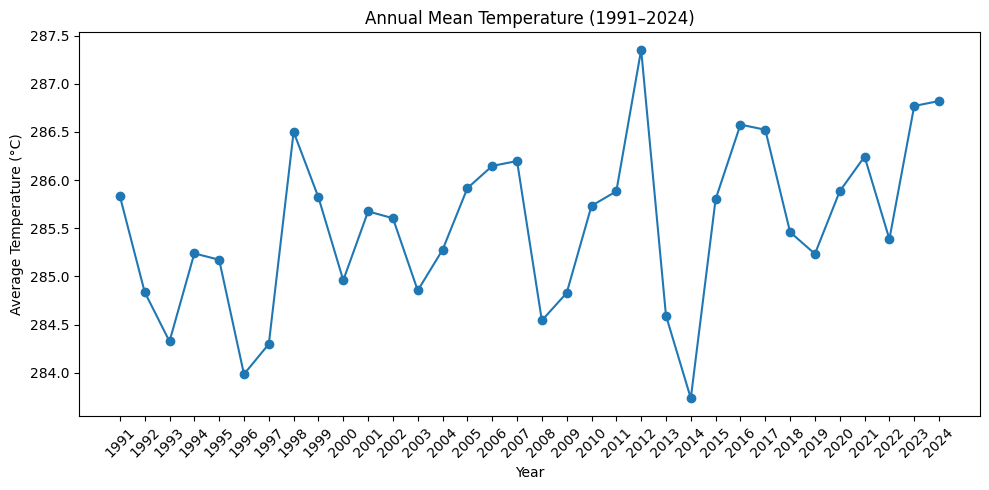

In [27]:
df_yearly = pd.read_csv('/home/emine2/ATMS-402/era5_yearly_avg.csv')

# 2. Plot year vs. avg_temp as a line
plt.figure(figsize=(10, 5))
plt.plot(df_yearly['year'], df_yearly['avg_temp'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Annual Mean Temperature (1991–2024)')
plt.xticks(df_yearly['year'], rotation=45)   # rotate x labels if needed
plt.tight_layout()
plt.show()

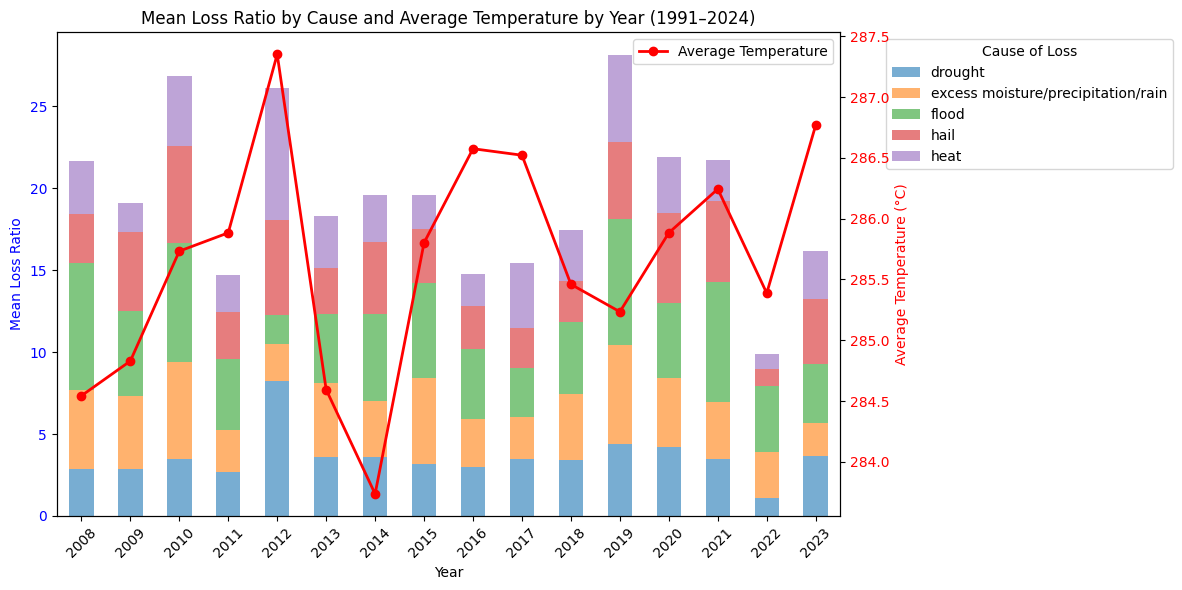

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the temperature data
df_yearly = pd.read_csv('/home/emine2/ATMS-402/era5_yearly_avg.csv')

# Assuming ins_corn is already loaded, create pivot table for loss ratio
pivot_loss_ratio = insurance.groupby(['year', 'cause_lower'])['loss_ratio'].mean().unstack().fillna(0)

# Ensure the years align between the two datasets
common_years = sorted(set(pivot_loss_ratio.index).intersection(set(df_yearly['year'])))
if not common_years:
    raise ValueError("No common years found between the datasets.")

# Filter both datasets to common years
pivot_loss_ratio = pivot_loss_ratio.loc[common_years]
df_yearly = df_yearly[df_yearly['year'].isin(common_years)].sort_values('year')

# Create figure and axis objects with a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stacked bar plot on primary y-axis (loss ratio) with different causes
pivot_loss_ratio.plot(kind='bar', stacked=True, ax=ax1, alpha=0.6)
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Loss Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(common_years)))
ax1.set_xticklabels(common_years, rotation=45)
ax1.legend(title='Cause of Loss', loc='upper left', bbox_to_anchor=(1.05, 1))

# Create secondary y-axis for temperature line plot
ax2 = ax1.twinx()
ax2.plot(range(len(common_years)), df_yearly['avg_temp'], color='red', marker='o', linestyle='-', linewidth=2, label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Add title and adjust layout
plt.title('Mean Loss Ratio by Cause and Average Temperature by Year (1991–2024)')
fig.tight_layout()

# Save the plot
plt.savefig('dual_axis_plot_with_causes_corrected.png')
plt.show()